In [21]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/%s'
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-m}} (k) / P_{\mathrm{m}} (k)$'
OBSBIAS = r"$b_{\mathrm{HI}} (k) = \sqrt{P_{\mathrm{HI}} (k) / P_{\mathrm{m}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'
XLAB = '$k$ (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'

def cclab(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    numerator = '\\mathrm{P}_{%s \\times %s}(%s)'%(name1, name2, fn)
    denom = '\\mathrm{P}_{%s}(%s) \\mathrm{P}_{%s}(%s)'%(name1, fn, name2, fn)
    CORRCOEF = 'r $(%s)$ = $\\frac{%s}{\\sqrt{%s}}$'%(fn, numerator, denom)
    return CORRCOEF

def ccrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    out = 'r$_{%s}$ $(%s)$ / r$_{%s}$ $(%s)$'%(name1, fn, name2, fn)
    return out

def pkrat(name1, name2, fn = 'k', rm = True):
    if rm:
        name1 = '\\mathrm{%s}'%name1
        name2 = '\\mathrm{%s}'%name2
    
    return "P$_{%s}$ $(%s)$ / P$_{%s}$ $(%s)$"%(name1, fn, name2, fn)

In [2]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))
ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')
ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.11866199299595938, 20])
ds.axisLabelArgs('both', fontsize = 16)
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            '', r'Color Ratio'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
ds.plotArgs('HI_fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('HI_fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('HI_fieldname', 'hisubhalo', {'color':'sandybrown'})
ds.plotArgs('fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('fieldname', 'hisubhalo', {'color':'sandybrown'})

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


# HI-Galaxy Z-evo

In [3]:
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found'}
fg = ds.figrid('snapshot', 'space', 'color', ip)

ip = {'is_auto':False, 'color_cut':'0.60', 'space':['rsd'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found'}
rsdfg = ds.figrid('snapshot', 'space', 'color', ip)
rsdfg.row_labels = ['']
rsdfg.col_labels = ['HI $\\times$ Blue RSD', 'HI $\\times$ Red RSD']

ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['ratio'], 'post_process':'no key found'}
ratfg = ds.figrid('snapshot', 'space', 'color', ip)

ip = {'is_auto':False, 'color_cut':'0.60', 'space':['rsd'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'snapshot':99}
onefg = ds.figrid('color', '', '', ip)
onefg.plotArgs({'color':'blue'}, {'label':'HI $\\times$ Blue RSD', 'color':'blue'})
onefg.plotArgs({'color':'red'}, {'label':'HI $\\times$ Red RSD', 'color':'red'})
onefg.autoFill({'alpha':0.8})


colors = ['blue', 'red', 'ratio']
snapshots = ds.getAttrVals('snapshot')
snapshots.reverse()
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
ratcols = seaborn.color_palette('Purples', len(snapshots))
coldict = {'red':redcols, 'blue':bluecols, 'ratio':ratcols}
for c in colors:
    for s in range(len(snapshots)):
        args = {'color':coldict[c][s]}
#         panels.append((2, 0)); panels.append((2, 1))
        ratfg.plotArgs({'color':c, 'snapshot':snapshots[s]}, args)
        fg.plotArgs({'color':c, 'snapshot':snapshots[s]}, args)
        rsdfg.plotArgs({'color':c, 'snapshot':snapshots[s]}, args)

fg.autoFill({'alpha':0.6})
rsdfg.autoFill({'alpha':0.6})
ratfg.autoFill({'alpha':0.6})

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red']
The row values for space: ['rsd']
The column values for color: ['blue', 'red']
The row values for space: ['real', 'redshift']
The column values for color: ['ratio']
The row values for : ['no key found']
The column values for : ['no key found']


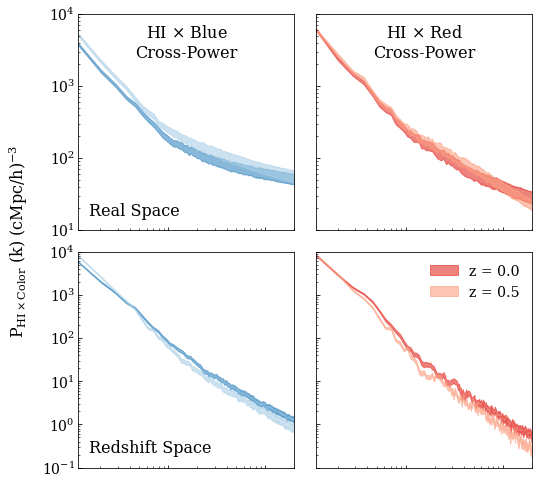

In [4]:
fg.axisArgs(slc = 'real', ylim = (10, 1e4))
fg.axisArgs(slc = 'redshift', ylim = (.1, 1e4))
fg.tickArgs(slc = 'red', labelleft = False)
XBORDER = [0.33, 0.25]
YBORDER = [0.33, 0.25]
fg.gspecArgs(xborder = XBORDER, yborder = YBORDER, wspace = 0.1, hspace = 0.1)
fg.tickArgs(labelbottom = False)
fg.setYLabel(YLAB%r"\mathrm{HI} \times \mathrm{Color}")
fg.plot()


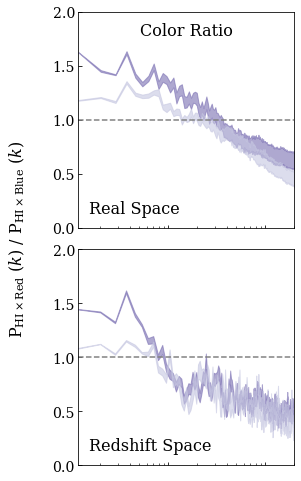

In [5]:
ratfg.axisArgs(yscale = 'linear', ylim = (0, 2))
ratfg.plotOnes()
ratfg.legendArgs(rm_legend = True)
ratfg.tickArgs(labelbottom = False)
ratfg.gspecArgs(hspace = 0.1, yborder = YBORDER)
ratfg.setYLabel(pkrat('\\mathrm{HI} \\times \\mathrm{Red}', '\\mathrm{HI} \\times \\mathrm{Blue}', rm = False))
ratfg.plot()


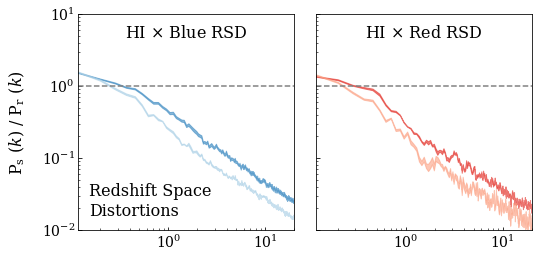

In [6]:
rsdfg.axisArgs(ylim = (.01, 10))
rsdfg.setDefaultTicksParams()
rsdfg.plotOnes()
rsdfg.setYLabel(pkrat('s', 'r'))
rsdfg.legendArgs(rm_legend = True)
rsdfg.colLabels([r'HI $\times$ Blue RSD', r'HI $\times$ Red RSD'])
rsdfg.gspecArgs(wspace = 0.1, xborder = XBORDER)
rsdfg.plot()

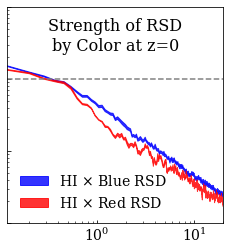

In [7]:
onefg.axisArgs(ylim = (.01, 10))
onefg.tickArgs(labelleft = False)
onefg.legendArgs(loc = 'lower left')
onefg.annotatePanel('Strength of RSD\nby Color at z=0', [0.5, 0.95], (0,0), ha = 'center', va = 'top', fontsize = 16)
onefg.gspecArgs(yborder = YBORDER)
onefg.plotOnes()
onefg.plot()

Text(0.5, 0, 'k (cMpc/h)$^{-1}$')

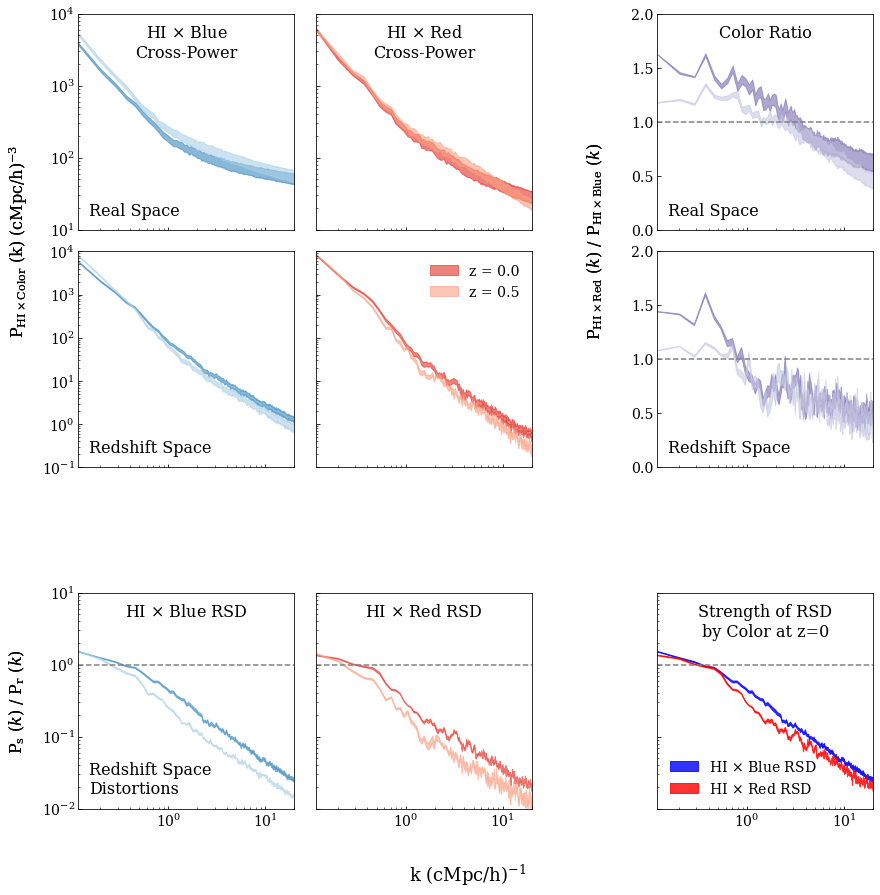

In [8]:
figarr = np.empty((2, 2), dtype = object)
figarr[0,0] = fg; figarr[1, 0] = rsdfg; figarr[0, 1] = ratfg; figarr[1, 1] = onefg
fig = ds.combine(figarr)
fig.text(0.5, 0, XLAB, ha = 'center', va = 'top', fontsize = 18)


In [9]:
fig.savefig(DRAFTPATH%"rvb_zevo.pdf")
fig.savefig("rvb_zevo.png")

In [10]:
def makeBlueRedRatio(datalist):
    from figrid.data_container import DataContainer
    ip = {'color':'blue', 'color_cut':'0.60', 'path':['fiducial'], 'post_process':'corr_coef'}
    blues = datalist.getMatching(ip)
    ratiolist = []
    for dc in blues:
        mattr = copy.deepcopy(dc.attrs)
        rmattr = []
        for k in mattr:
            if 'runtime' in k or 'color' == k:
                rmattr.append(k)
        for rm in rmattr:
            del mattr[rm]
        mattr['color'] = 'red'
        reds = datalist.getMatching(mattr)
        if len(reds) > 1:
            print('%d corresponding reds for a blue:'%len(reds))
            print("BLUE ATTRS:")
            print(dc.attrs)
            print("RED ATTRS:")
            for r in reds:
                print(r.attrs)
        if len(reds) == 0:
            print('no reds found')
            print(dc.attrs)
        else:
            reds = reds[0]
            data = [dc.data[0], reds.data[1]/dc.data[1]]
            ratio = DataContainer(data)
            mattr['color'] = 'ratio'
            mattr['post_process'] = 'corr_ratio'
            ratio.update(mattr)
            ratiolist.append(ratio)
    return ratiolist

corr_ratios = makeBlueRedRatio(ds)
ds.extend(corr_ratios)

In [11]:
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'corr_coef', 'space':'real'}
fg = ds.figrid('snapshot', 'color', 'space', ip)

ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['ratio'], 'post_process':'corr_ratio', 'space':'real'}
ratfg = ds.figrid('snapshot', 'color', '', ip)
colors = ['blue', 'red', 'ratio']
snapshots = ds.getAttrVals('snapshot')
snapshots.reverse()
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
ratcols = seaborn.color_palette('Purples', len(snapshots))
coldict = {'red':redcols, 'blue':bluecols, 'ratio':ratcols}
for c in colors:
    for s in range(len(snapshots)):
        args = {'color':coldict[c][s]}
#         panels.append((2, 0)); panels.append((2, 1))
        ratfg.plotArgs({'color':c, 'snapshot':snapshots[s]}, args)
        fg.plotArgs({'color':c, 'snapshot':snapshots[s]}, args)

The row values for color: ['blue', 'red']
The column values for space: ['real']
The row values for color: ['ratio']
The column values for : ['no key found']


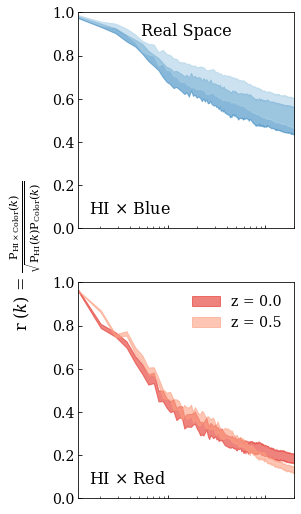

In [12]:
ALPHA = 0.6
fg.autoFill(alpha = ALPHA)
fg.axisArgs(yscale = 'linear', ylim = (0, 1))
fg.rowLabels(['HI $\\times$ Blue', 'HI $\\times$ Red'])
# fg.colLabels(pos = [0.5, 0.05])
# fg.tickArgs(labelbottom = False)
fg.setDefaultTicksParams()
fg.setXLabel(XLAB)
fg.setYLabel(cclab('HI', 'Color'))
fg.plot()

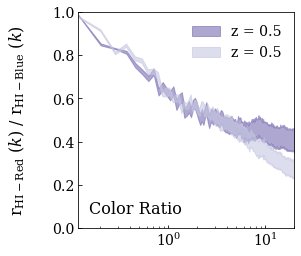

In [14]:
ratfg.autoFill(alpha = ALPHA)
ratfg.axisArgs(ylim = (0, 1), yscale = 'linear')
ratfg.setYLabel(ccrat('HI-Red', 'HI-Blue'))
ratfg.plot()

The row values for space: ['real']
The column values for color: ['blue', 'red', 'resolved']


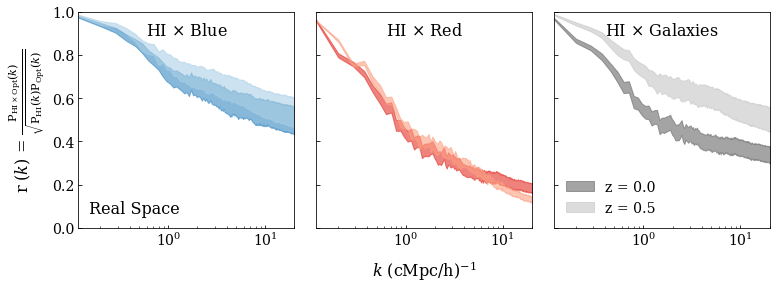

In [23]:
ip = {'is_auto':False, 'color_cut':['0.60', 'None'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red', 'resolved'], 'post_process':'corr_coef', 'space':'real'}
fg = ds.figrid('snapshot', 'space', 'color', ip)

colors = ['blue', 'red', 'resolved']
snapshots = ds.getAttrVals('snapshot')
snapshots.reverse()
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
ratcols = seaborn.color_palette('Greys', len(snapshots))
coldict = {'red':redcols, 'blue':bluecols, 'resolved':ratcols}
for c in colors:
    for s in range(len(snapshots)):
        args = {'color':coldict[c][s]}
#         panels.append((2, 0)); panels.append((2, 1))
#         ratfg.plotArgs({'color':c, 'snapshot':snapshots[s]}, args)
        fg.plotArgs({'color':c, 'snapshot':snapshots[s]}, args)

fg.autoFill(alpha = ALPHA)
fg.axisArgs(yscale = 'linear', ylim = (0, 1))
fg.colLabels(['HI $\\times$ Blue', 'HI $\\times$ Red', 'HI $\\times$ Galaxies'])
# fg.colLabels(pos = [0.5, 0.05])
# fg.tickArgs(labelbottom = False)
fg.setDefaultTicksParams()
fg.legendArgs(loc = 'lower left')
fg.setXLabel(XLAB)
fg.gspecArgs(wspace = 0.1)
fg.setYLabel(cclab('HI', 'Opt'))
fg.plot()
fg.save(DRAFTPATH%"corrcoef_rvb_zevo.pdf")
fg.save("corrcoef_rvb_zevo.png")